In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets, layers, models

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

Image (#9): Which is digit '4'


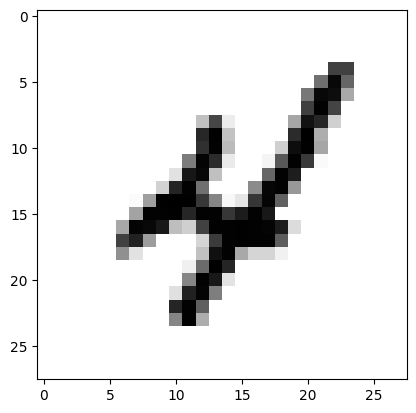

In [8]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

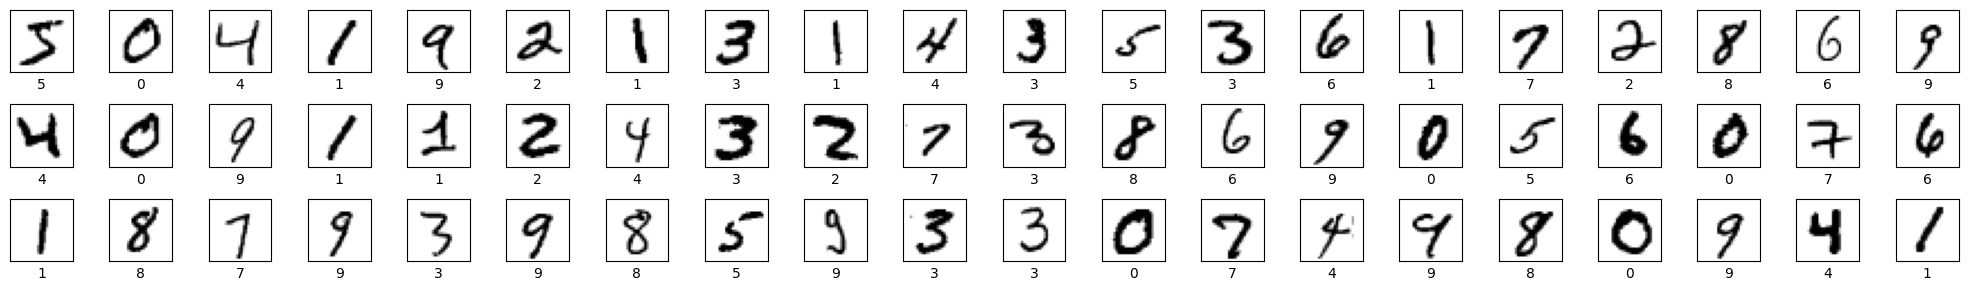

In [9]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
h = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 16s 5ms/step - loss: 0.1426 - accuracy: 0.9561 - val_loss: 0.0482 - val_accuracy: 0.9847
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0473 - accuracy: 0.9848 - val_loss: 0.0392 - val_accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0324 - val_accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0325 - val_accuracy: 0.9897
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0300 - val_accuracy: 0.9922


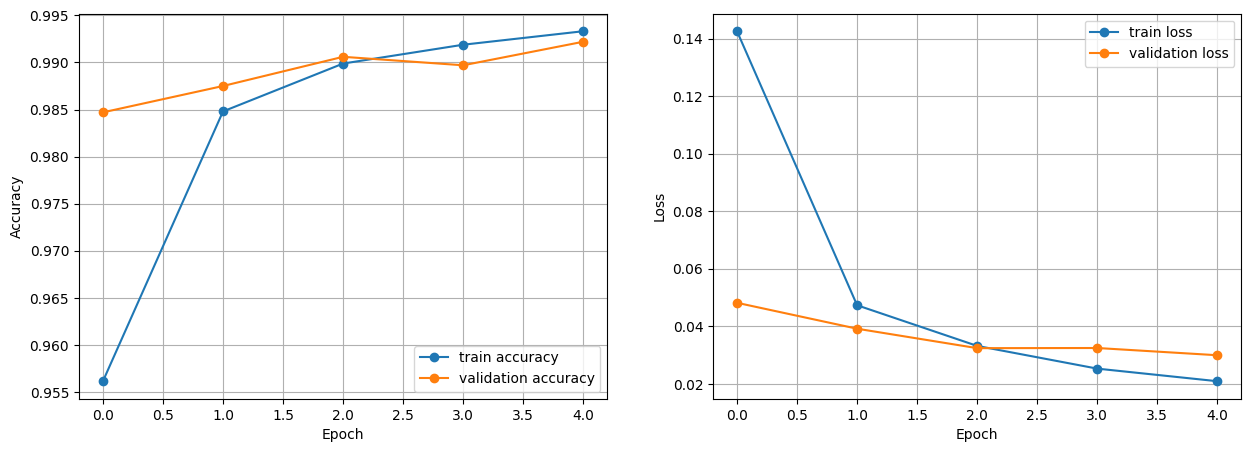

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [15]:
sgd_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
sgd_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [16]:
sgd_model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
g = sgd_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5620 - accuracy: 0.8364 - val_loss: 0.1508 - val_accuracy: 0.9565
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1362 - accuracy: 0.9579 - val_loss: 0.0857 - val_accuracy: 0.9734
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0935 - accuracy: 0.9712 - val_loss: 0.0695 - val_accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0738 - accuracy: 0.9776 - val_loss: 0.0641 - val_accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0611 - accuracy: 0.9814 - val_loss: 0.0535 - val_accuracy: 0.9818


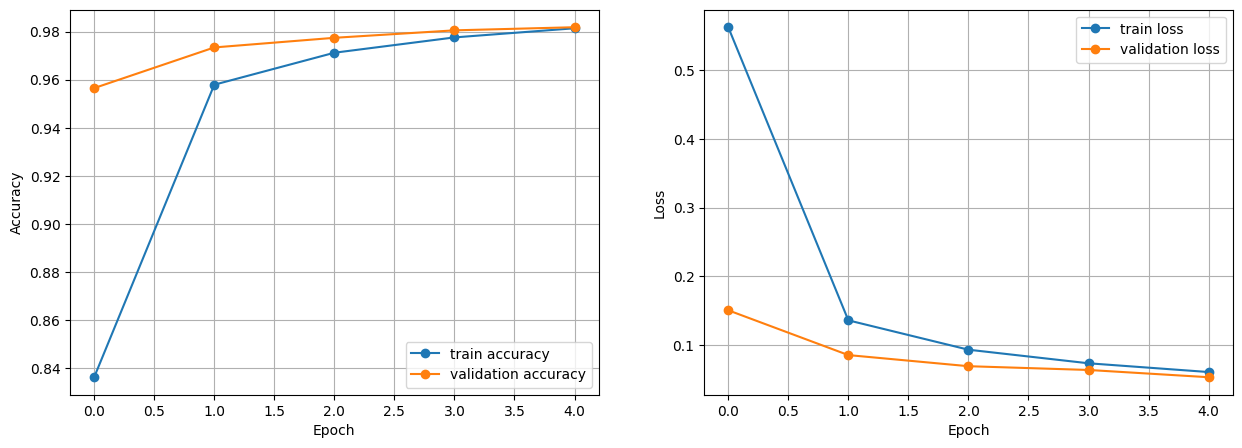

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(g.history['accuracy'], 'o-', label='train accuracy')
plt.plot(g.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(g.history['loss'], 'o-', label='train loss')
plt.plot(g.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [19]:
rmsprop_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
rmsprop_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [20]:
rmsprop_model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
e = rmsprop_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1414 - accuracy: 0.9558 - val_loss: 0.0433 - val_accuracy: 0.9857
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0298 - val_accuracy: 0.9903
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.0284 - val_accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0242 - accuracy: 0.9930 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0431 - val_accuracy: 0.9901


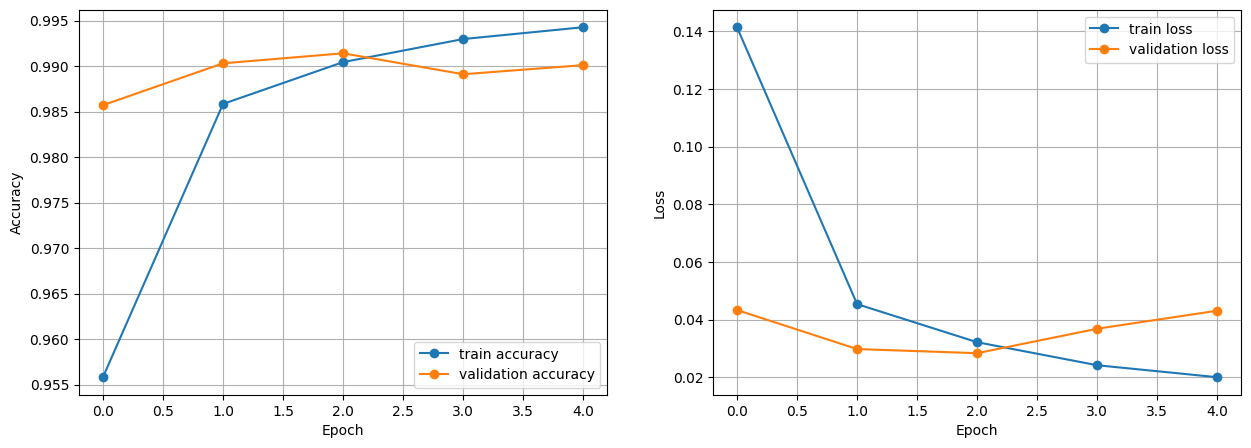

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(e.history['accuracy'], 'o-', label='train accuracy')
plt.plot(e.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(e.history['loss'], 'o-', label='train loss')
plt.plot(e.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

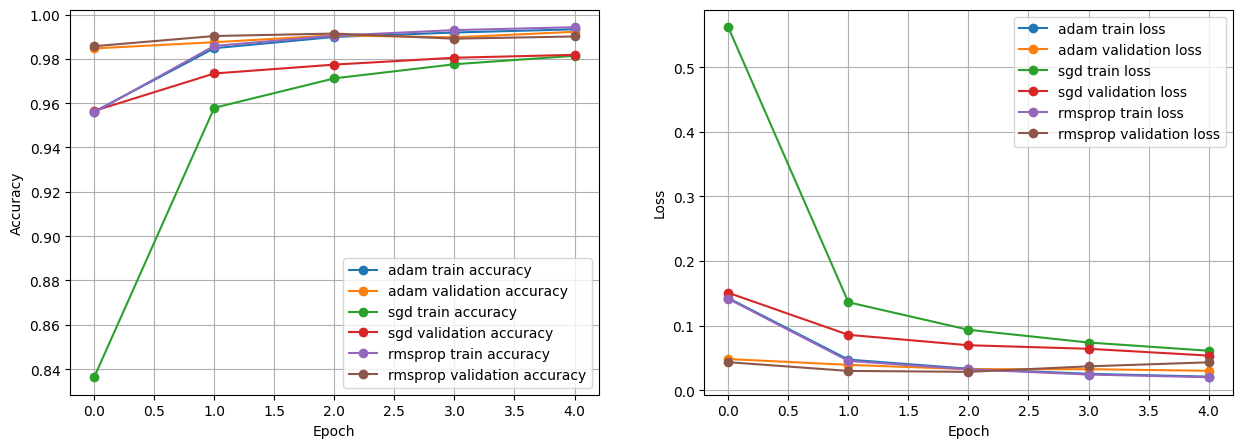

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='adam train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'adam validation accuracy')
plt.plot(g.history['accuracy'], 'o-', label='sgd train accuracy')
plt.plot(g.history['val_accuracy'], 'o-', label = 'sgd validation accuracy')
plt.plot(e.history['accuracy'], 'o-', label='rmsprop train accuracy')
plt.plot(e.history['val_accuracy'], 'o-', label = 'rmsprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='adam train loss')
plt.plot(h.history['val_loss'], 'o-', label='adam validation loss')
plt.plot(g.history['loss'], 'o-', label='sgd train loss')
plt.plot(g.history['val_loss'], 'o-', label='sgd validation loss')
plt.plot(e.history['loss'], 'o-', label='rmsprop train loss')
plt.plot(e.history['val_loss'], 'o-', label='rmsprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

<h1 style="color: red">So, We can see that the average accuracy of the RMSprop optimizer is the highest and loss of this is the lowest.<h1>